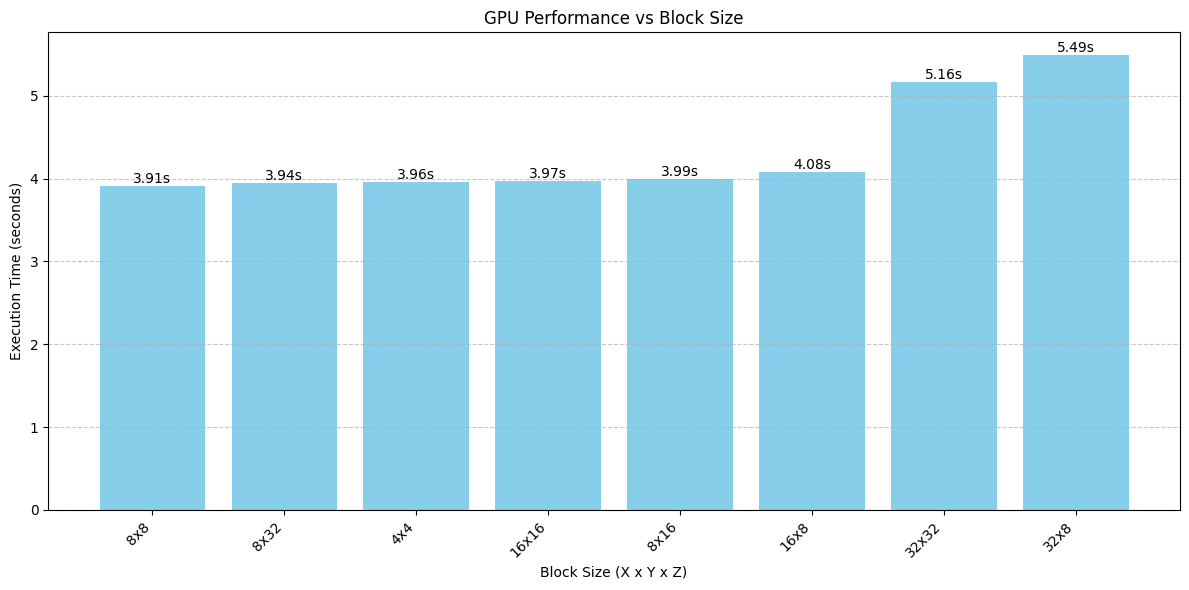

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def extract_time(filename):
    with open(filename) as f:
        for line in f:
            if "Time in seconds" in line:
                return float(line.split()[-1])
    return None

def extract_block_size(filename):
    # Извлекаем размер блока из имени файла (например: gpu_8x8x8.txt -> 8x8x8)
    return filename.split('_')[1].split('.')[0]

def extract_performance_data(files):
    data = []
    for file in files:
        block_size = extract_block_size(file)
        time = extract_time(file)
        if time is not None:
            # Преобразуем размер блока в удобный для отображения формат
            dims = tuple(map(int, block_size.split('x')))
            data.append((dims, time))

    # Сортируем по времени выполнения
    data.sort(key=lambda x: x[1])
    return data

def plot_results(data):
    labels = ['x'.join(map(str, dims)) for dims, _ in data]
    times = [time for _, time in data]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, times, color='skyblue')

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}s',
                 ha='center', va='bottom')

    plt.title('GPU Performance vs Block Size')
    plt.xlabel('Block Size (X x Y x Z)')
    plt.ylabel('Execution Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Сохраняем график
    plt.savefig('block_size_performance.png', dpi=300)
    plt.show()

def main():
    # Ищем все файлы результатов
    result_files = glob.glob('gpu_*.txt')

    if not result_files:
        print("No result files found (gpu_*.txt)")
        return

    data = extract_performance_data(result_files)
    plot_results(data)

if __name__ == "__main__":
    main()

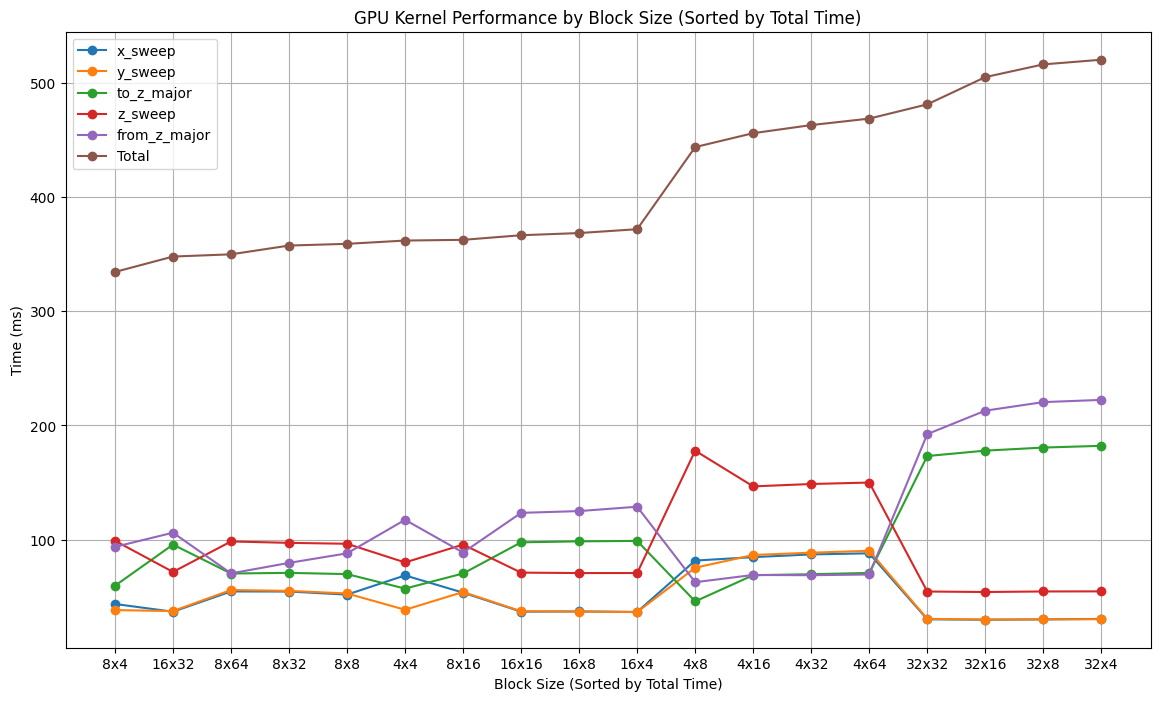

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def parse_profile(file_path):
    block_sizes = []
    data = {
        'x_sweep': [],
        'y_sweep': [],
        'to_z_major': [],
        'z_sweep': [],
        'from_z_major': [],
        'Total': []
    }

    with open(file_path, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            line = lines[i].strip()
            if line.startswith('Block size:'):
                block_size = line.split(': ')[1]
                block_sizes.append(block_size)
                i += 1
                for _ in range(6):
                    if i >= len(lines):
                        break
                    data_line = lines[i].strip()
                    if ': ' in data_line:
                        key, value = data_line.split(': ')
                        value = float(value.split(' ')[0])
                        data[key].append(value)
                    i += 1
            else:
                i += 1
    return block_sizes, data

file_path = 'gpu_profile.txt'
block_sizes, data = parse_profile(file_path)

# Сортировка данных по возрастанию Total
sorted_indices = np.argsort(data['Total'])
sorted_block_sizes = [block_sizes[i] for i in sorted_indices]
sorted_data = {key: [values[i] for i in sorted_indices] for key, values in data.items()}

# Подготовка данных для графика
operations = ['x_sweep', 'y_sweep', 'to_z_major', 'z_sweep', 'from_z_major', 'Total']
x = np.arange(len(sorted_block_sizes))  # позиции для отсортированных блоков

# Создание графика
plt.figure(figsize=(14, 8))

# Построение линий для каждой операции
for op in operations:
    if op in sorted_data:
        plt.plot(x, sorted_data[op], marker='o', label=op)

# Настройка графика
plt.title('GPU Kernel Performance by Block Size (Sorted by Total Time)')
plt.xlabel('Block Size (Sorted by Total Time)')
plt.ylabel('Time (ms)')
plt.xticks(x, sorted_block_sizes)
plt.legend()
plt.grid(True)

plt.show()

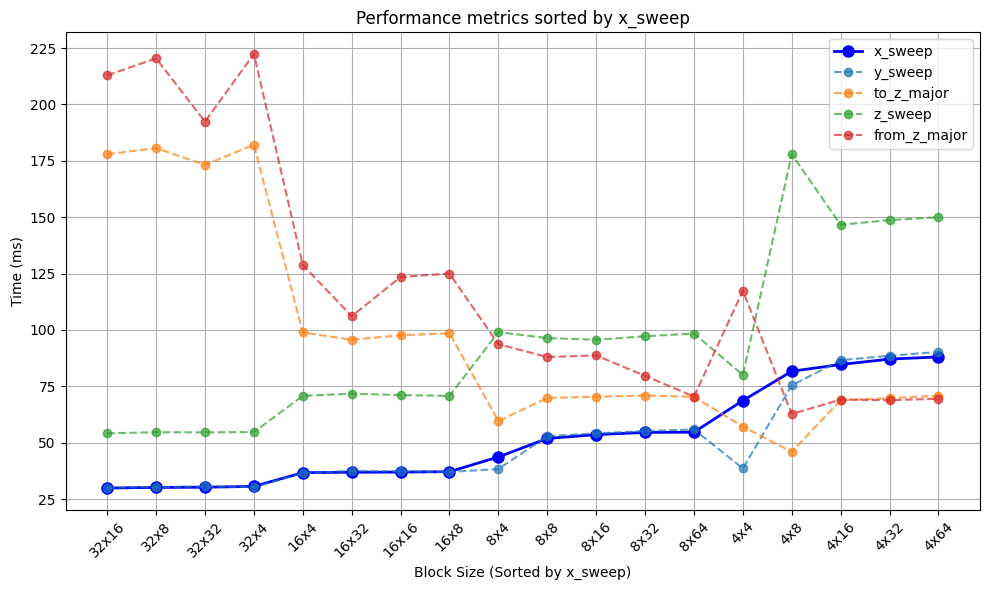

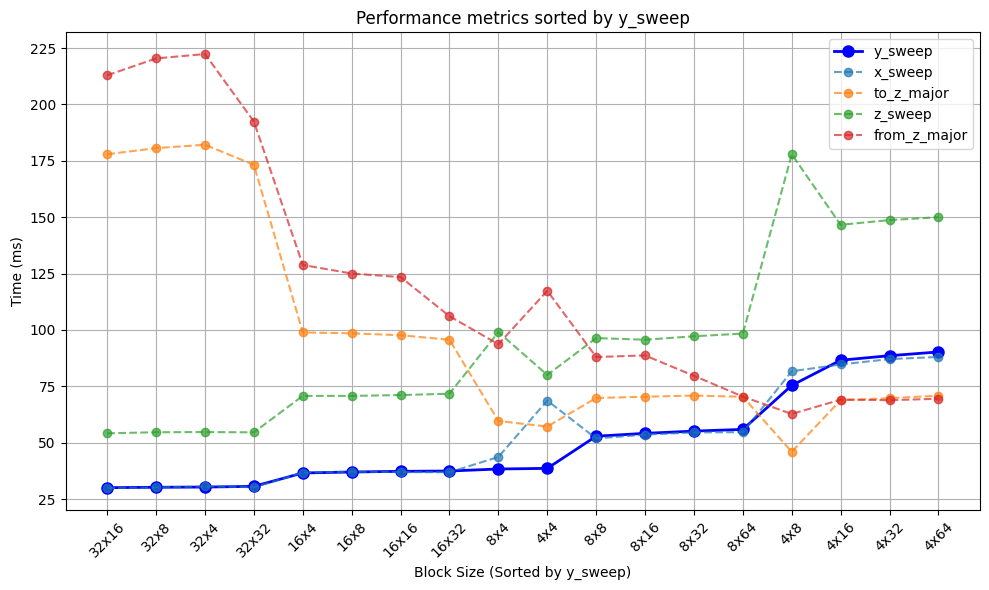

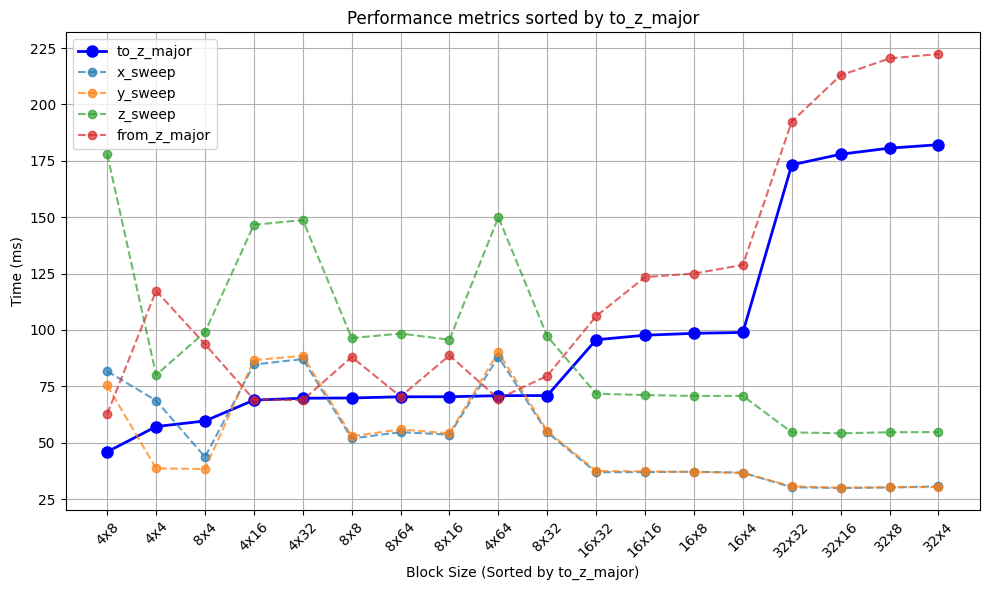

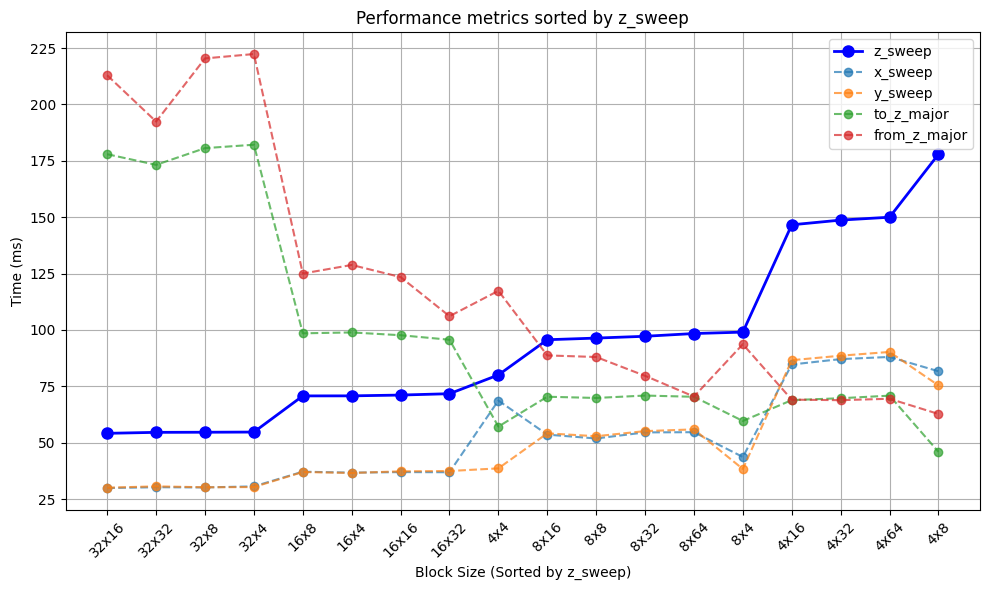

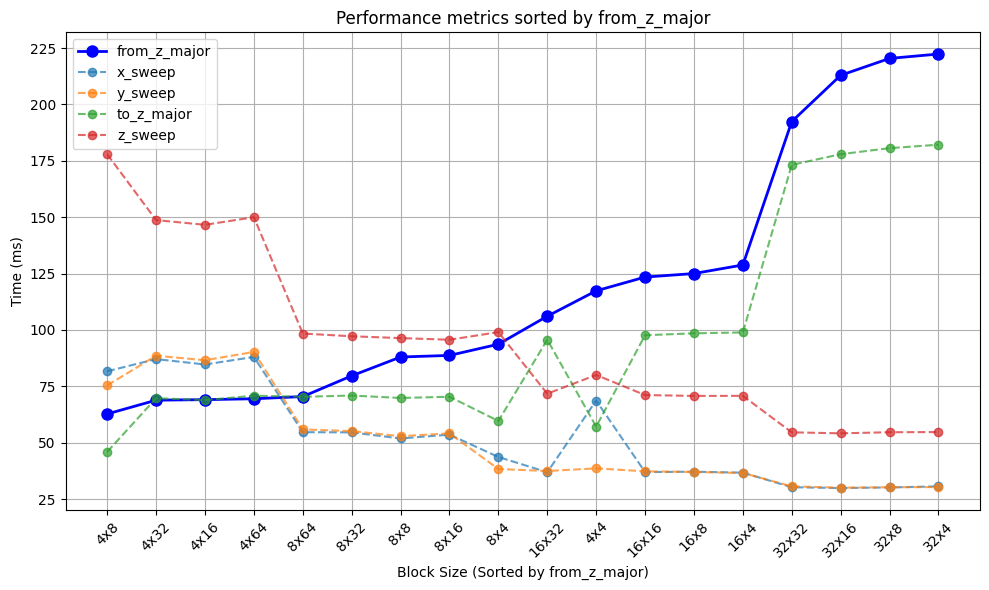

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для создания отдельного графика для одного параметра
def plot_sorted_metric(metric_name, block_sizes, data):
    # Сортируем данные по текущему метрику
    sorted_indices = np.argsort(data[metric_name])
    sorted_blocks = [block_sizes[i] for i in sorted_indices]

    # Создаем фигуру
    plt.figure(figsize=(10, 6))

    # Рисуем основной параметр (жирной линией)
    plt.plot(np.arange(len(sorted_blocks)),
             [data[metric_name][i] for i in sorted_indices],
             'b-o', linewidth=2, markersize=8, label=metric_name)

    # Рисуем остальные параметры (тонкими линиями)
    other_metrics = [m for m in data.keys() if m not in [metric_name, 'Total']]
    for metric in other_metrics:
        plt.plot(np.arange(len(sorted_blocks)),
                 [data[metric][i] for i in sorted_indices],
                 '--o', alpha=0.7, label=metric)

    plt.title(f'Performance metrics sorted by {metric_name}')
    plt.xlabel('Block Size (Sorted by ' + metric_name + ')')
    plt.ylabel('Time (ms)')
    plt.xticks(np.arange(len(sorted_blocks)), sorted_blocks, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Создаем отдельные графики для каждого параметра (кроме Total)
metrics_to_plot = ['x_sweep', 'y_sweep', 'to_z_major', 'z_sweep', 'from_z_major']

for metric in metrics_to_plot:
    plot_sorted_metric(metric, block_sizes, data)

Пожалуйста, загрузите ваш файл 'gpu_profile.txt' в сессионное хранилище Google Colab.
Для этого нажмите на иконку папки слева, затем на иконку 'Загрузить в сессионное хранилище'.
Убедитесь, что файл называется именно 'gpu_profile.txt'.
------------------------------
Попытка чтения данных из файла: gpu_profile.txt...
Парсинг завершен. Прочитано 72 запусков.

Строим график времени выполнения для каждого этапа...


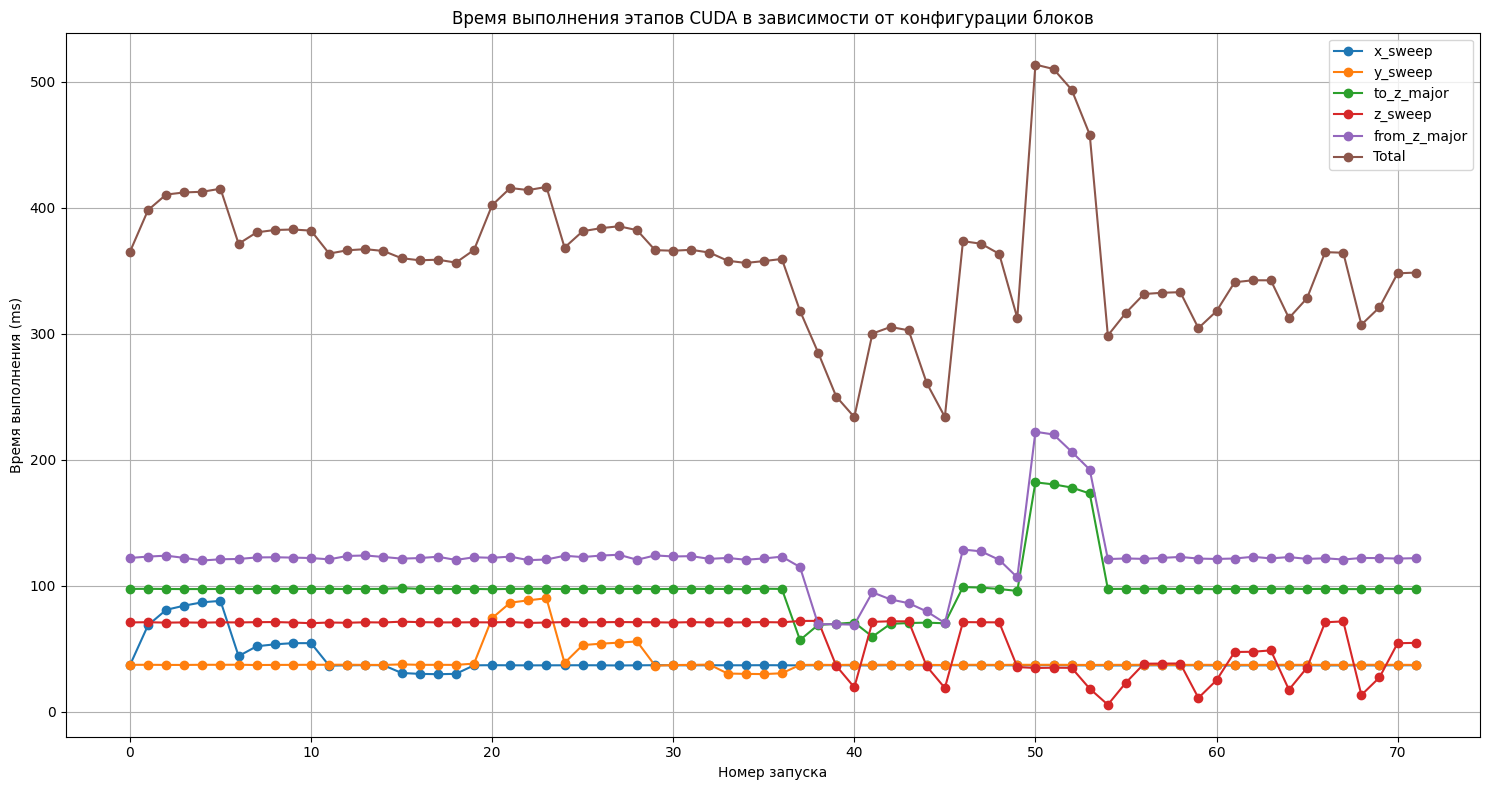


--- Оптимальные размеры блоков для каждого параметра (кроме Total) ---

Параметр: x_sweep
Минимальное время: 29.8935 ms
Оптимальный(ые) размер(ы) блока(ов) для этого параметра:
  x_sweep block: 32x16

Параметр: y_sweep
Минимальное время: 29.9684 ms
Оптимальный(ые) размер(ы) блока(ов) для этого параметра:
  y_sweep block: 32x16

Параметр: to_z_major
Минимальное время: 56.9897 ms
Оптимальный(ые) размер(ы) блока(ов) для этого параметра:
  reorder block: 4x4

Параметр: z_sweep
Минимальное время: 5.6830 ms
Оптимальный(ые) размер(ы) блока(ов) для этого параметра:
  z_sweep block: 4x4

Параметр: from_z_major
Минимальное время: 69.1932 ms
Оптимальный(ые) размер(ы) блока(ов) для этого параметра:
  reorder block: 4x64

Анализ завершен. График показан выше.


In [2]:
import matplotlib.pyplot as plt
import re

# --- Инструкции для пользователя ---
print("Пожалуйста, загрузите ваш файл 'gpu_profile.txt' в сессионное хранилище Google Colab.")
print("Для этого нажмите на иконку папки слева, затем на иконку 'Загрузить в сессионное хранилище'.")
print("Убедитесь, что файл называется именно 'gpu_profile.txt'.")
print("-" * 30)


# --- Парсинг данных из файла ---
file_path = 'gpu_profile.txt'
runs_data = []
current_run_data = {}

print(f"Попытка чтения данных из файла: {file_path}...")

try:
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line: # Пустая строка - разделитель между запусками
                if current_run_data:
                    runs_data.append(current_run_data)
                current_run_data = {}
            elif ' block: ' in line:
                key, value = line.split(': ', 1)
                current_run_data[key.strip()] = value.strip()
            elif ':' in line:
                key, value_str = line.split(': ', 1)
                try:
                    match = re.search(r'(\d+\.?\d*)', value_str)
                    if match:
                        time_ms = float(match.group(1))
                        current_run_data[key.strip()] = time_ms
                    else:
                         print(f"Предупреждение: Не удалось найти числовое значение времени в строке: {line}")

                except ValueError:
                    print(f"Предупреждение: Не удалось конвертировать время в число из строки: {line}")
                except Exception as e:
                    print(f"Неожиданная ошибка при парсинге времени из строки {line}: {e}")


    # Добавляем данные последнего запуска, если файл не заканчивается пустой строкой
    if current_run_data:
        runs_data.append(current_run_data)

    print(f"Парсинг завершен. Прочитано {len(runs_data)} запусков.")

except FileNotFoundError:
    print(f"Ошибка: Файл '{file_path}' не найден.")
    print("Пожалуйста, убедитесь, что вы загрузили файл с правильным именем в сессионное хранилище Colab.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при чтении или парсинге файла: {e}")
    exit()


# Проверка, что данные были успешно прочитаны
if not runs_data:
    print("Ошибка: Не удалось прочитать данные из файла. Проверьте формат файла.")
    exit()

# --- Подготовка данных для графика ---
run_indices = list(range(len(runs_data)))
# Определяем ключи для временных показателей, которые хотим отобразить
# Используем набор ключей из первого запуска, чтобы быть гибкими
all_keys = runs_data[0].keys()
time_keys = [key for key in all_keys if ' block' not in key]

# Убедимся, что 'Total' есть в списке и, если нужно, переместим его в конец для графика
if 'Total' in all_keys:
     if 'Total' in time_keys:
         time_keys.remove('Total')
     time_keys.append('Total') # Добавляем Total в конец списка ключей для графика

plot_data = {key: [] for key in time_keys}

for run in runs_data:
    for key in time_keys:
        plot_data[key].append(run.get(key, None))


# --- Построение графика ---
print("\nСтроим график времени выполнения для каждого этапа...")

plt.figure(figsize=(15, 8))

for key, times in plot_data.items():
    valid_indices = [i for i, val in enumerate(times) if val is not None]
    valid_times = [val for val in times if val is not None]
    if valid_indices:
        plt.plot([run_indices[i] for i in valid_indices], valid_times, marker='o', linestyle='-', label=key)


plt.xlabel("Номер запуска")
plt.ylabel("Время выполнения (ms)")
plt.title("Время выполнения этапов CUDA в зависимости от конфигурации блоков")

if len(run_indices) < 50:
    plt.xticks(run_indices)
else:
     plt.locator_params(axis='x', nbins=10)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Поиск оптимальных параметров (исключая Total) ---
print("\n--- Оптимальные размеры блоков для каждого параметра (кроме Total) ---")

# Ключи для поиска оптимальных значений, исключая 'Total'
optimization_keys = [key for key in time_keys if key != 'Total']

# Словарь для маппинга ключей времени к ключам размеров блоков
# Основываясь на вашем примере и типичной структуре
block_key_mapping = {
    'x_sweep': 'x_sweep block',
    'y_sweep': 'y_sweep block',
    'z_sweep': 'z_sweep block',
    'to_z_major': 'reorder block', # Предполагаем, что эти этапы связаны с reorder блоком
    'from_z_major': 'reorder block', # Предполагаем, что эти этапы связаны с reorder блоком
}


for key in optimization_keys:
    min_time = float('inf')
    optimal_runs = []

    # Находим минимальное время
    for i, run in enumerate(runs_data):
        current_time = run.get(key)
        if current_time is not None:
            if current_time < min_time:
                min_time = current_time
                optimal_runs = [run]
            elif current_time == min_time:
                optimal_runs.append(run)

    if optimal_runs:
        print(f"\nПараметр: {key}")
        print(f"Минимальное время: {min_time:.4f} ms")
        print("Оптимальный(ые) размер(ы) блока(ов) для этого параметра:")

        # Определяем соответствующий ключ размера блока
        relevant_block_key = block_key_mapping.get(key)

        if relevant_block_key:
            for run in optimal_runs:
                block_size = run.get(relevant_block_key, "Неизвестно")
                print(f"  {relevant_block_key}: {block_size}")
        else:
             print(f"  (Маппинг для параметра '{key}' не найден)")

    else:
        print(f"\nПараметр: {key}")
        print("Данные для этого параметра не найдены.")

print("\nАнализ завершен. График показан выше.")